<a href="https://colab.research.google.com/github/PurpleCoder-23/Deep-learning/blob/main/HUMAN_EMOTIONS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.src.layers.preprocessing.image_preprocessing import RandomFlip
from keras.src.optimizers.legacy.adam import Adam
from keras.src.regularizers import L2
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout,Flatten,Activation,InputLayer,RandomRotation,RandomFlip,RandomContrast
from keras.layers import Conv2D,MaxPool2D,BatchNormalization,Resizing,Rescaling

from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy,TopKCategoricalAccuracy
from keras.optimizers import Adam
from keras.utils import to_categorical
import cv2
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
import albumentations as A
import tensorflow_probability as tfp
from tensorflow.keras.regularizers import L2,L1
from tensorflow.train import BytesList,FloatList,Int64List
from tensorflow.train import Example,Features,Feature
from google.colab import drive


In [ ]:
train_directory="/content/dataset/EmotionsDataset_Splitted/data/train"
val_directory="/content/dataset/EmotionsDataset_Splitted/data/test"

CLASS_NAMES=["angry","happy","nothing","sad"]



CONFIGURATION={
    "BATCH_SIZE":32,
    "IM_SIZE":256,
    "LEARNING_RATE":0.001,
    "N_EPOCHS":20,
    "DROPOUT_RATE":0.0,
    "REGULARIZATION_RATE":0.0,
    "N_FILTERS":6,
    "KERNEL_SIZE":3,
    "N_STRIDES":1,
    "POOL_SIZE":2,
    "N_DENSE_1":100,
    "N_DENSE_2":10,
    "NUM_CLASSES":4

}

In [ ]:
! pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600  /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

 95% 295M/309M [00:02<00:00, 125MB/s]
100% 309M/309M [00:02<00:00, 140MB/s]


In [ ]:
!unzip '/content/human-emotions-datasethes.zip' -d '/content/dataset/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/EmotionsDataset/data/nothing/720.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/721.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/722.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/723.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/724.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/725.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/726.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/727.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/728.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/729.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/73.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/730.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/731.jpg  
  inflating: /content/dataset/EmotionsDataset/data/no

In [ ]:
train_dataset=tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99,


)

Found 3152 files belonging to 4 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
val_dataset=tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,


)

Found 788 files belonging to 4 classes.


In [ ]:
for i in val_dataset.take(1):
  print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[2.50000000e+01, 4.60000000e+01, 3.90000000e+01],
         [4.61250000e+01, 6.87500000e+01, 5.93125000e+01],
         [2.14375000e+01, 4.44375000e+01, 3.44375000e+01],
         ...,
         [0.00000000e+00, 2.94375000e+01, 1.90625000e+01],
         [0.00000000e+00, 2.61875000e+01, 1.66250000e+01],
         [0.00000000e+00, 2.70000000e+01, 1.50000000e+01]],

        [[2.17500000e+01, 4.43750000e+01, 3.65625000e+01],
         [2.63710938e+01, 4.93007812e+01, 4.10312500e+01],
         [9.60546875e+00, 3.20468750e+01, 2.19960938e+01],
         ...,
         [4.41796875e+00, 3.43125000e+01, 2.53593750e+01],
         [1.32031250e+00, 2.90820312e+01, 1.88593750e+01],
         [0.00000000e+00, 2.13125000e+01, 9.31250000e+00]],

        [[1.13750000e+01, 3.71250000e+01, 2.84375000e+01],
         [1.49804688e+01, 4.07304688e+01, 3.20429688e+01],
         [7.30468750e+00, 3.33125000e+01, 2.25625000e+01],
         ...,
         

DATA VISUALIZATION

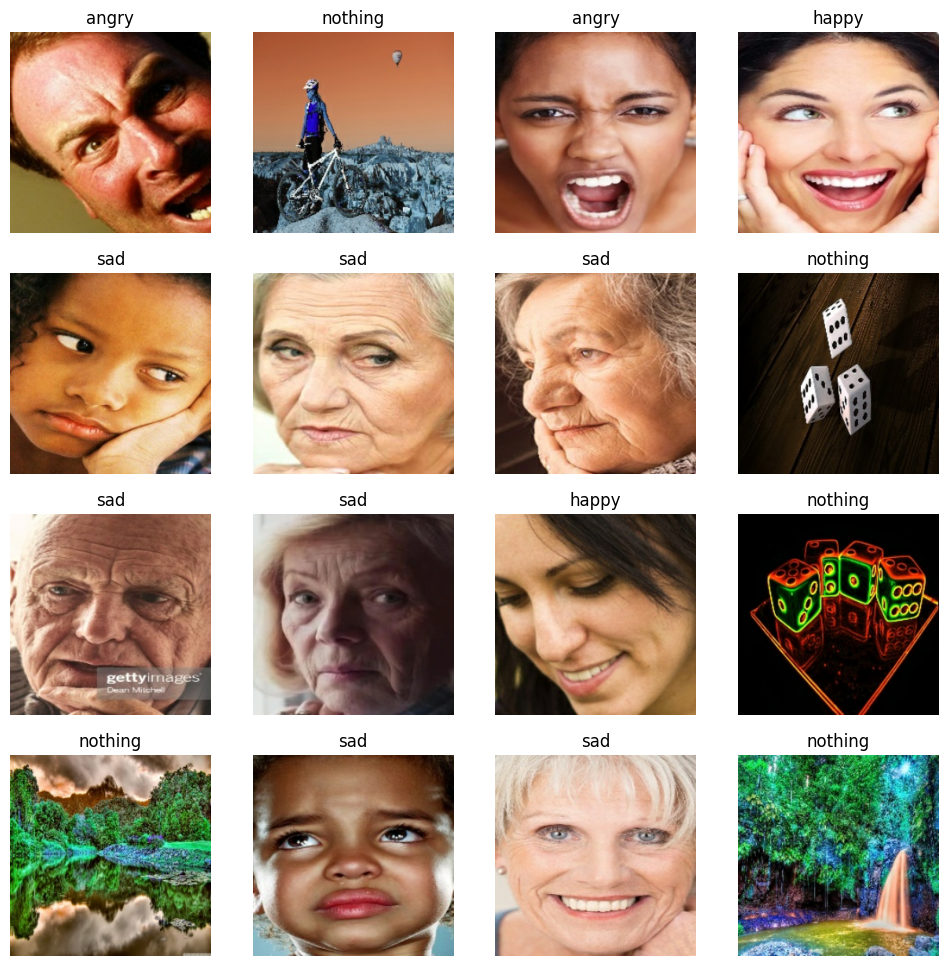

In [ ]:
plt.figure(figsize=(12,12))

for images,labels in train_dataset.take(1):
  for i in range(16):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(images[i]/255.)
    plt.title(CLASS_NAMES[tf.argmax(labels[i],axis=0).numpy()])
    plt.axis("off")

DATA AUGMENTATION

In [ ]:
##tf.keras.layer augment
augment_layers =tf.keras.Sequential([
    RandomRotation(factor=(-0.025,0.025)),
    RandomFlip(mode="horizontal",),
    RandomContrast(factor=0.1),
])

In [ ]:
from keras.src.engine.sequential import training
def augment_layer(image,label):
  return augment_layers(image,training=True),label

CUTMIX DATAAUGMENTATION

In [ ]:
def box(lamda):


  r_x=tf.cast(tfp.distributions.Uniform(0,CONFIGURATION["IM_SIZE"]).sample(1)[0],dtype=tf.int32)
  r_y=tf.cast(tfp.distributions.Uniform(0,CONFIGURATION["IM_SIZE"]).sample(1)[0],dtype=tf.int32)

  r_w=tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda),dtype=tf.int32)
  r_h=tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda),dtype=tf.int32)


  r_x=tf.clip_by_value(r_x-r_w//2,0,CONFIGURATION["IM_SIZE"])
  r_y=tf.clip_by_value(r_y-r_h//2,0,CONFIGURATION["IM_SIZE"])

  x_b_r=tf.clip_by_value(r_x+r_w//2,0,CONFIGURATION["IM_SIZE"])
  y_b_r=tf.clip_by_value(r_y+r_h//2,0,CONFIGURATION["IM_SIZE"])

  r_w=x_b_r - r_x
  if(r_w==0):
   r_w=1
  r_h=y_b_r - r_y
  if(r_h==0):
   r_h=1

  return r_y,r_x,r_h,r_w









In [ ]:
def cutmix(train_dataset_1,train_dataset_2):
  (image_1,label_1),(image_2,label_2)=train_dataset_1,train_dataset_2

  lamda=tfp.distributions.Beta(0.2,0.2)
  lamda=lamda.sample(1)[0]


  r_y,r_x,r_h,r_w=box(lamda)
  crop_2=tf.image.crop_to_bounding_box(image_2,r_y,r_x,r_h,r_w)
  pad_2=tf.image.pad_to_bounding_box(crop_2,r_y,r_x,CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"])


  crop_1=tf.image.crop_to_bounding_box(image_1,r_y,r_x,r_h,r_w)
  pad_1=tf.image.pad_to_bounding_box(crop_1,r_y,r_x,CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"])


  image=image_1-pad_1+pad_2


  lamda=tf.cast(1 - (r_w*r_h)/(CONFIGURATION["IM_SIZE"]*CONFIGURATION["IM_SIZE"]),dtype=tf.float32)
  label=lamda*tf.cast(label_1,dtype=tf.float32) + (1 - lamda)*tf.cast(label_2,dtype=tf.float32)

  return image,label


DATASET PREPARATION

In [ ]:

train_dataset_1=train_dataset.map(augment_layer,num_parallel_calls=tf.data.AUTOTUNE)
train_dataset_2=train_dataset.map(augment_layer,num_parallel_calls=tf.data.AUTOTUNE)

mixed_dataset=tf.data.Dataset.zip((train_dataset_1,train_dataset_2))

In [ ]:
training_dataset=(
    mixed_dataset
    .map(cutmix, num_parallel_calls=tf.data.AUTOTUNE)
    #.prefetch(tf.data.AUTOTUNE)
)

In [ ]:
val_dataset=(
    val_dataset
    #.prefetch(tf.data.AUTOTUNE)
)

In [ ]:
resize_rescale_layers=tf.keras.Sequential(
    [
    Resizing(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]),
    Rescaling(1/255)
])

TENSORFLOWRECORDS

In [ ]:
training_dataset=(
    training_dataset
    .unbatch()
)

In [ ]:
validation_dataset=(
    val_dataset
    .unbatch()
)

In [ ]:
training_dataset

<_UnbatchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4,), dtype=tf.float32, name=None))>

In [ ]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [ ]:
def create_example(image,label):

   bytes_feature = Feature(
   bytes_list=BytesList(value=[image]))

   int_feature = Feature(
   int64_list=Int64List(value=[label]))

   example = Example(
    features=Features(feature={
        'images': bytes_feature,
         'labels': int_feature,

    }))
   return example.SerializerToString()

In [ ]:
NUM_SHARDS=10

PATH="tfrecords/shard_(:02d).tfrecord"


In [ ]:
def encode_image(image,label):
  image=tf.image.convert_image_dtype(image,dtype=tf.uint8)
  image=tf.io.encode_jpeg(image)
  return image, label

In [ ]:
encoded_dataset=(
    training_dataset
    .map(encode_image)
)

In [ ]:


for shard_number in range(NUM_SHARDS):


   sharded_dataset=(
      encoded_dataset
      .shard(NUM_SHARDS,shard_number)
      .as_numpy_iterator()   )

# Write the records to a file.
   with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:

    for encoded_image,encoded_label in sharded_dataset:

      example=create_example(encoded_image,encoded_label)
      file_writer.write(example)




TypeError: ignored

In [ ]:
recons_dataset=tf.data.TFRecordDataset(
    filenames=[PATH.format(p) for p in range(NUM_SHARDS)]
)

In [ ]:
def parse_tfrecords(example):
  feature_description={
      "images":tf.io.FixedLenFeature([],tf.string),
      "labels":tf.io.FixedLenFeature([],int64),
  }

  example=tf.io.parse_single_example(example,feature_description)
  example["image"]=tf.io.decode_jpeg(example["images"],channels=3)


  return example["images"],example["labels"]

In [ ]:
parsed_dataset=(
    recons_dataset
    .map(parse_tfrecords)
    .batch(CONFIGURATION["BATCH_SIZE"])
    .prefetch(tf.data.AUTOTUNE)
)

NameError: ignored

In [ ]:
parsed_dataset

NameError: ignored

In [ ]:
for i in parsed_dataset.take(1):
  print(i)

NameError: ignored

MODELING AND TRAINING

In [ ]:
lenet_model=tf.keras.Sequential(
    [
    InputLayer(input_shape=(None,None,3)),
    resize_rescale_layers,

    Conv2D(filters=CONFIGURATION["N_FILTERS"],kernel_size=CONFIGURATION["KERNEL_SIZE"],strides=CONFIGURATION["N_STRIDES"],padding="valid",
           activation='relu',
           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])
    ),
    BatchNormalization(),
    MaxPool2D(pool_size=CONFIGURATION["POOL_SIZE"],strides=CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate=CONFIGURATION["DROPOUT_RATE"] ),
    Conv2D(filters=CONFIGURATION["N_FILTERS"]*2+4,kernel_size=CONFIGURATION["KERNEL_SIZE"],strides=CONFIGURATION["N_STRIDES"],padding='valid',
           activation='relu',
           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])
     ) ,
    BatchNormalization(),
    MaxPool2D(pool_size=CONFIGURATION["POOL_SIZE"],strides=CONFIGURATION["N_STRIDES"]*2),


    Flatten(),

    Dense(CONFIGURATION["N_DENSE_1"],activation='relu',kernel_regularizer=L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),
    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),

    Dense(CONFIGURATION["N_DENSE_2"],activation='relu',kernel_regularizer=L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"],activation='softmax')

    ]
)

lenet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 254, 254, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 6)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 127, 127, 6)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 16)     

TRAINING

In [ ]:
loss_function=CategoricalCrossentropy()

In [ ]:
metrics=[CategoricalAccuracy(name="accuracy"),TopKCategoricalAccuracy(k=2,name="top_k_accuracy")]

In [ ]:
lenet_model.compile(
    optimizer=Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
    loss=loss_function,
    metrics=metrics
)

In [ ]:
history=lenet_model.fit(
    training_dataset,
    validation_data=val_dataset,
    epochs=CONFIGURATION['N_EPOCHS'],
    verbose=1
)

Epoch 1/20


ValueError: ignored

<ipython-input-96-2cc139004b8f>:6: UserWarning: The label '_' of 'i' starts with '_'. It is thus excluded from the legend.
  plt.legend('train_loss','val_loss')
<ipython-input-96-2cc139004b8f>:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('train_loss','val_loss')


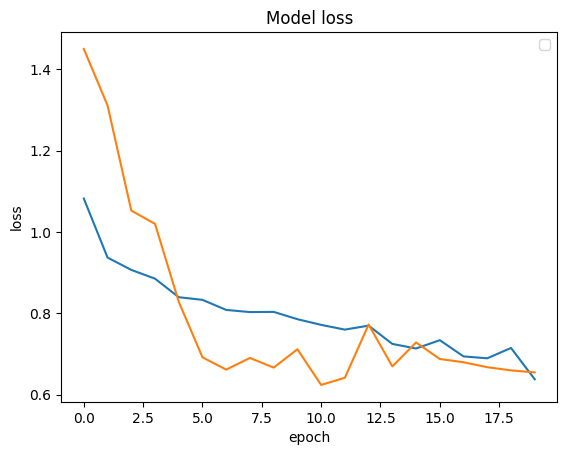

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('train_loss','val_loss')
plt.show()

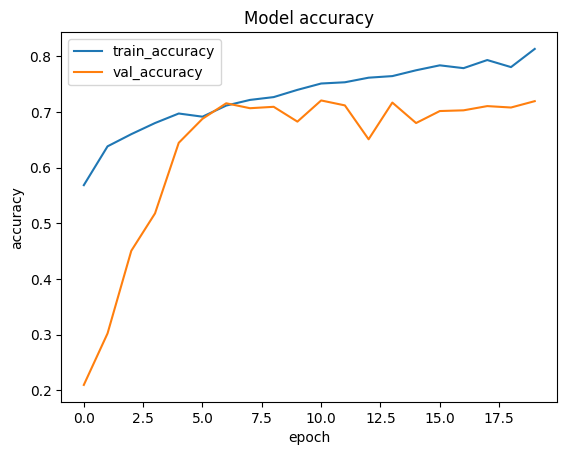

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])

EVALUATION

In [ ]:
lenet_model.evaluate(val_dataset)

25/25 [==============================] - 1s 33ms/step - loss: 0.6548 - accuracy: 0.7195 - top_k_accuracy: 0.8871


[0.6548450589179993, 0.7195431590080261, 0.8870558142662048]

TEST

In [ ]:
test_image=cv2.imread("/content/dataset/EmotionsDataset_Splitted/data/test/happy/1.jpg")


im=tf.constant(test_image,dtype=tf.float32)

im=tf.expand_dims(im,axis=0)
print(CLASS_NAMES[tf.argmax(lenet_model(im),axis=-1).numpy()[0]])

nothing


In [ ]:
test_image=cv2.imread("/content/dataset/EmotionsDataset_Splitted/data/test/sad/1.jpg")


im=tf.constant(test_image,dtype=tf.float32)

im=tf.expand_dims(im,axis=0)
print(CLASS_NAMES[tf.argmax(lenet_model(im),axis=-1).numpy()[0]])

happy


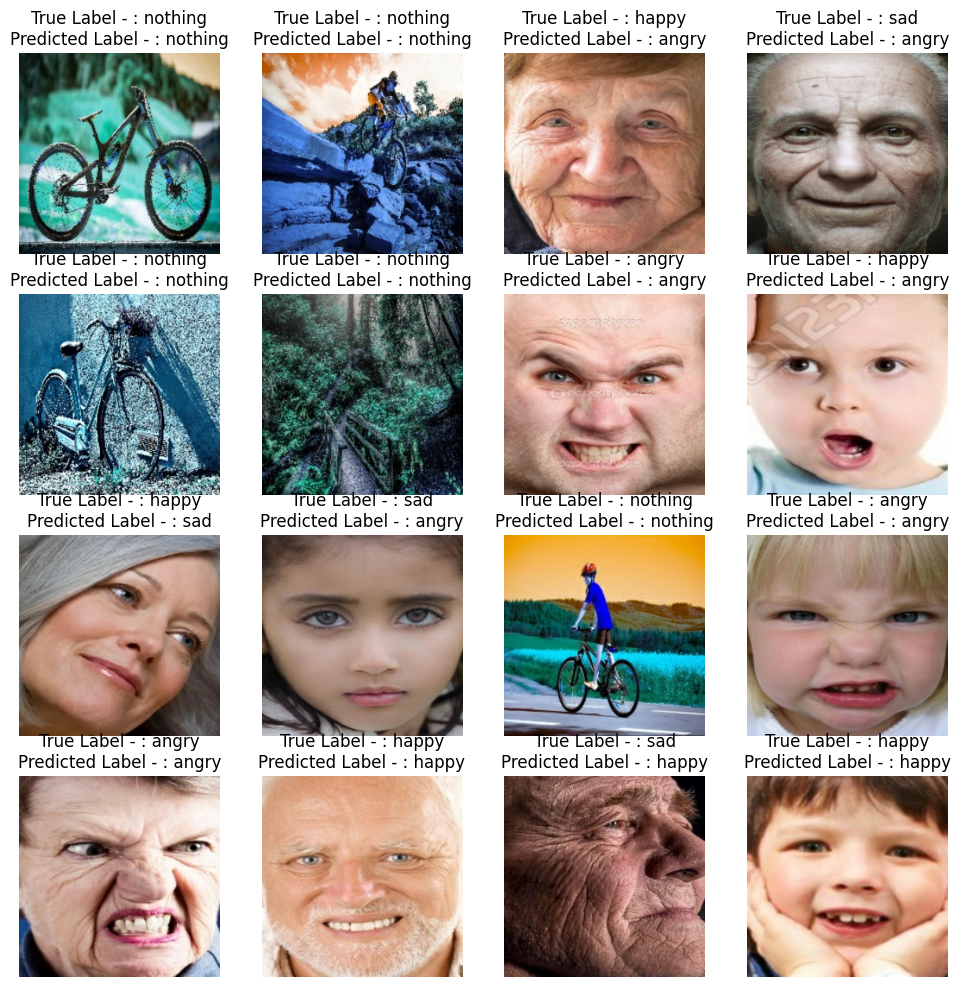

In [ ]:
plt.figure(figsize=(12,12))

for images,labels in val_dataset.take(1):
  for i in range(16):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(images[i]/255.)
    plt.title("True Label - : " + CLASS_NAMES[tf.argmax(labels[i],axis=0).numpy()] + "\n" + "Predicted Label - : " + CLASS_NAMES[tf.argmax(lenet_model(tf.expand_dims(images[i],axis=0)),axis=-1).numpy()[0]])
    plt.axis("off")

CONFUSION MATRIX


In [ ]:
predicted=[]
labels=[]

for im,label in val_dataset:
  predicted.append(lenet_model(im))
  labels.append(label.numpy())

In [ ]:

print(numpy.argmax(labels[:-1],axis=-1).flatten())
#print(numpy.concatenate(numpy.argmax(predicted[:-1],))
#print(numpy.concatenate(numpy.argmax(predicted[:-1],)
print(numpy.argmax(predicted[:-1],axis=-1).flatten())

[2 2 1 3 2 2 0 1 1 3 2 0 0 1 3 1 3 2 3 3 3 3 3 1 1 3 0 2 1 0 0]
[1 2 2 2 3 2 2 0 1 2 2 1 1 1 3 1 3 0 3 1 2 2 1 2 0 2 3 0 3 1 2 2 0 2 2 3 3
 1 3 0 0 3 1 0 0 0 2 2 2 0 3 2 1 2 2 3 2 2 2 0 0 0 0 2 0 0 2 2 1 3 2 3 1 2
 0 3 2 2 2 1 2 0 2 0 1 0 1 1 1 0 3 1 3 1 0 2 0 2 1 2 1 3 1 2 2 2 1 0 1 0 2
 3 2 3 1 3 0 1 3 2 2 2 0 0 1 1 3 0 1 1 2 2 1 3 2 2 1 0 0 2 1 1 0 1 3 0 3 3
 1 1 3 0 1 2 2 3 3 2 0 1 2 1 0 0 2 1 0 0 1 0 0 3 3 3 0 1 0 0 1 0 2 0 1 3 0
 0 3 0 1 2 0 1 0 2 3 0 0 2 1 3 0 1 2 0 2 0 2 1 3 2 0 1 1 2 2 1 1 0 2 0 2 2
 2 2 0 2 0 2 3 0 3 2 2 0 1 2 0 0 1 3 3 1 0 1 3 1 1 1 2 1 3 1 1 0 1 2 2 0 0
 0 1 0 3 2 0 0 3 0 2 0 1 1 2 2 1 2 1 0 2 0 2 2 1 2 2 0 2 1 2 3 0 2 2 0 2 3
 3 2 0 2 3 2 0 3 1 1 1 0 2 1 0 2 2 1 1 3 0 0 0 2 2 1 3 1 1 0 1 3 3 2 2 1 3
 0 2 3 1 3 0 3 0 0 0 1 2 1 3 2 2 3 2 0 1 0 0 0 3 0 1 1 1 0 0 2 1 1 2 0 3 1
 2 0 3 2 3 1 0 1 1 1 2 0 1 3 3 2 1 2 2 0 0 2 1 2 0 2 1 1 1 0 1 0 1 2 3 1 2
 2 3 3 1 1 3 3 2 3 2 2 1 1 2 0 0 0 2 0 1 1 2 3 0 0 0 0 2 0 2 0 2 2 1 0 0 1
 0 1 0 3 1 1 2 3 1 1 0 1 3 1 0 1 1 1

In [ ]:
pred=numpy.argmax(labels[:-1],axis=-1).flatten()
lab=numpy.argmax(labels[:-1],axis=-1).flatten()

[[ 6  0  0  0]
 [ 0  8  0  0]
 [ 0  0  7  0]
 [ 0  0  0 10]]


Text(70.72222222222221, 0.5, 'Actual')

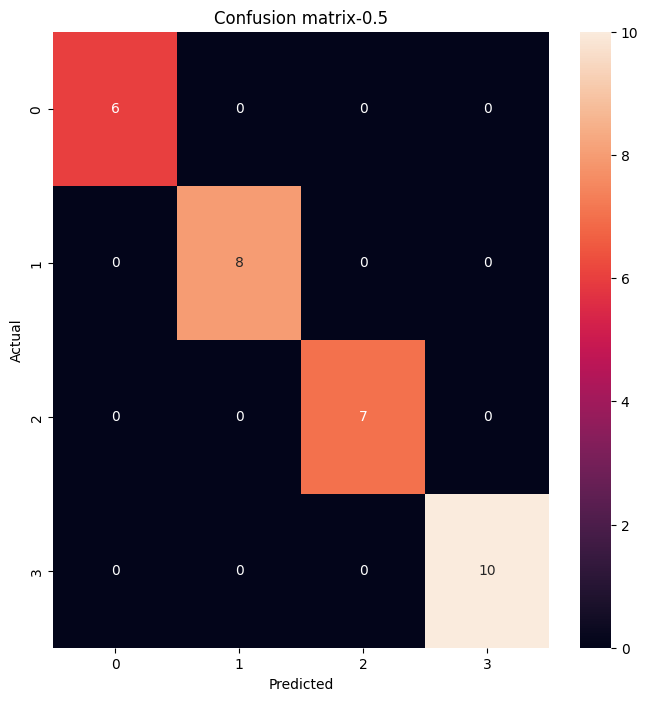

In [ ]:

threshold=0.5


cm=confusion_matrix(lab,pred)
print(cm)
plt.figure(figsize=(8,8))

sns.heatmap(cm,annot=True)
plt.title('Confusion matrix-{}'.format(threshold))
plt.xlabel('Predicted')
plt.ylabel('Actual')